In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [122]:
corona_cases = pd.read_csv('time_series-ncov-Confirmed.csv', parse_dates=['Date'], skiprows=[1])
corona_cases = corona_cases.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_cases"})
corona_cases = corona_cases.fillna(0)
corona_cases.location[corona_cases.location == 'US'] = 'United States of America'
corona_cases = corona_cases.sort_values(['date', 'total_cases'])
corona_cases.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_cases
59,0,Afghanistan,33.0000,65.0000,2020-01-22,0
119,0,Albania,41.1533,20.1683,2020-01-22,0
179,0,Algeria,28.0339,1.6596,2020-01-22,0
239,0,Andorra,42.5063,1.5218,2020-01-22,0
299,0,Angola,-11.2027,17.8739,2020-01-22,0


In [123]:
countries = corona_cases[corona_cases.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': corona_cases[corona_cases.location == country].date.max(),
        'total_cases': sum(corona_cases.total_cases[(corona_cases.location == country) & (corona_cases.date == corona_cases[corona_cases.location == country].date.max())])
    }
    corona_cases = corona_cases.append(total, ignore_index=True)


corona_cases = corona_cases.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 



In [124]:
death_dataset = pd.read_csv('time_series-ncov-Death.csv', parse_dates=['Date'], skiprows=[1])
death_dataset = death_dataset.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_deaths"})
death_dataset = death_dataset.fillna(0)
death_dataset.location[death_dataset.location == 'US'] = 'United States of America'
death_dataset = death_dataset.sort_values(['date', 'total_deaths'])
death_dataset.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_deaths
59,0,Afghanistan,33.0000,65.0000,2020-01-22,0
119,0,Albania,41.1533,20.1683,2020-01-22,0
179,0,Algeria,28.0339,1.6596,2020-01-22,0
239,0,Andorra,42.5063,1.5218,2020-01-22,0
299,0,Angola,-11.2027,17.8739,2020-01-22,0


In [125]:
countries = death_dataset[death_dataset.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': death_dataset[death_dataset.location == country].date.max(),
        'total_deaths': sum(death_dataset.total_deaths[(death_dataset.location == country) & (death_dataset.date == death_dataset[death_dataset.location == country].date.max())])
    }
    death_dataset = death_dataset.append(total, ignore_index=True)


death_dataset = death_dataset.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 


In [126]:
map_df = gpd.read_file('./ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')


In [127]:
merged = map_df.set_index('SOVEREIGNT').join(death_dataset.set_index('location'))
merged = merged.fillna(0)
merged = merged[merged.ADMIN != 'Antarctica']

In [128]:
merged2 = map_df.set_index('SOVEREIGNT').join(corona_cases.set_index('location'))
merged2 = merged2.fillna(0)
merged2 = merged2[merged2.ADMIN != 'Antarctica']

## Corona Death rate

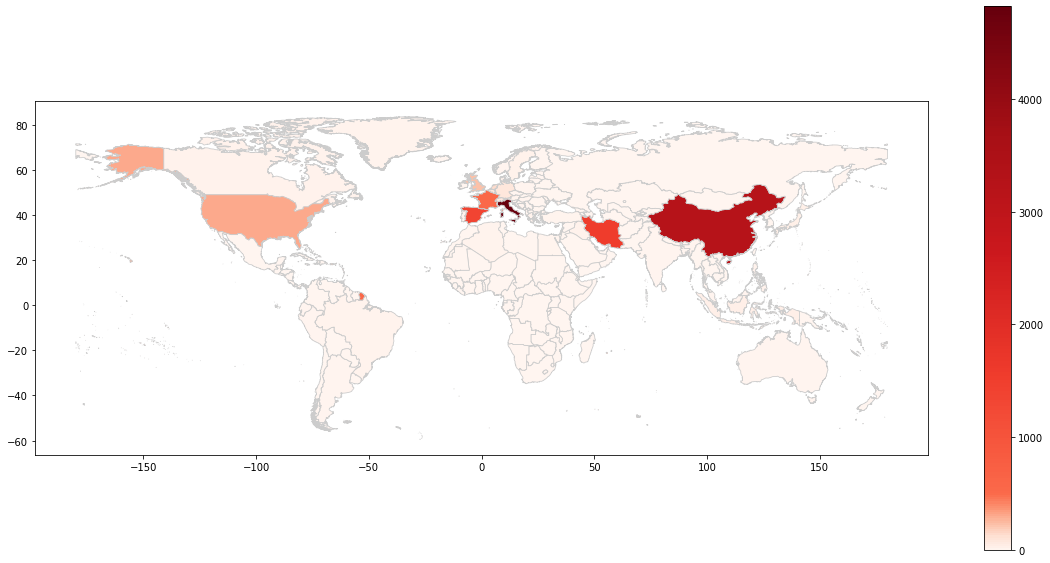

In [150]:
variable = 'total_deaths'
# set the range for the choropleth
vmin, vmax = 10, merged.total_deaths.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
divnorm = colors.DivergingNorm(vmin=0, vcenter=500, vmax=vmax)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=divnorm)
plt.show()
ax.axis('off')


# add a title
ax.set_title('Corona Death rate', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=divnorm)
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('testmap.png', dpi=300)



## Corona Cases

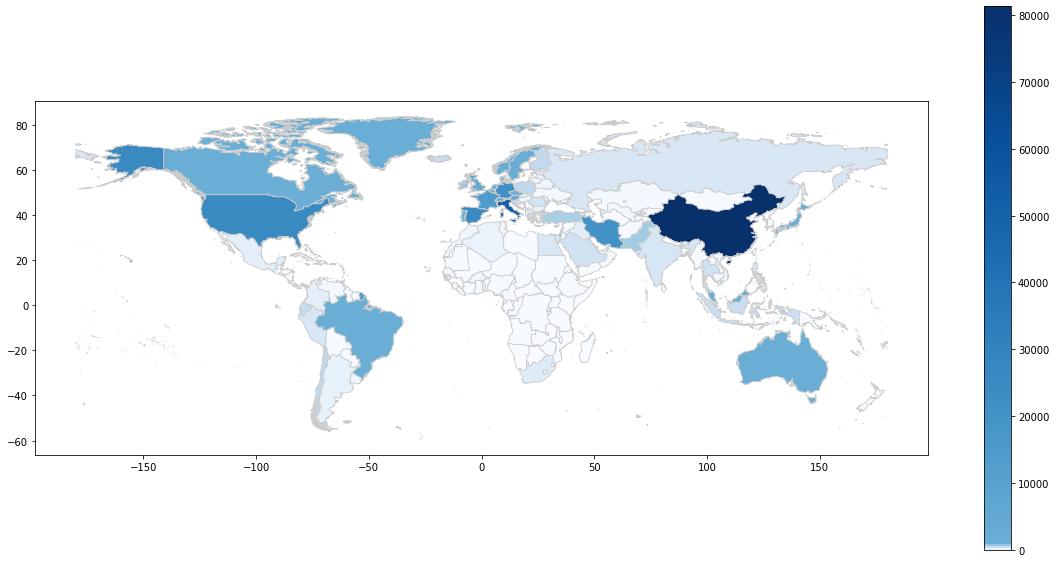

In [175]:
variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = 10, merged2.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
cmap = 'Blues'

divnorm = colors.DivergingNorm(vmin=0, vcenter=1000, vmax=vmax)

merged2.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=divnorm, legend=True)
plt.show()
ax.axis('off')
# add a title
ax.set_title('Corona Cases', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=divnorm)
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('testmap2.png', dpi=300)

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

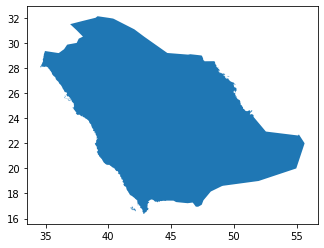

In [177]:
ksa = map_df[map_df['SOVEREIGNT']=='Saudi Arabia']
ksa
ksa.plot()

In [178]:
map_df[map_df['SOVEREIGNT']=='Saudi Arabia']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
106,Admin-0 country,0,2,Saudi Arabia,SAU,0,2,Sovereign country,Saudi Arabia,SAU,...,사우디아라비아,Saoedi-Arabië,Arabia Saudyjska,Arábia Saudita,Саудовская Аравия,Saudiarabien,Suudi Arabistan,Ả Rập Saudi,沙特阿拉伯,"MULTIPOLYGON (((50.80787 24.74665, 50.88101 24..."
